# Tumor Detection VAE

In [10]:
import sys 
import os 

sys.path.append(os.path.abspath(".."))

In [11]:
import torch
from torch import optim
import matplotlib.pyplot as plt
from src.model import VAE
from src.configs import brain_configs
from src.train import train
from src.utils import load_brain, visualize_brain_examples, visualize_heatmap
from PIL import Image
from torchvision import transforms

In [12]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [13]:
root = r"C:\Users\Ángel\Documents\GitHub\vae-project\notebooks\data\mri_brain_tumor\Training\notumor"
img_list = os.listdir(root)
print(len(img_list))

1909


In [14]:
brain_loader = load_brain(root)

In [15]:
for batch in brain_loader:
    print(f"{batch.shape}")
    break

torch.Size([64, 65536])


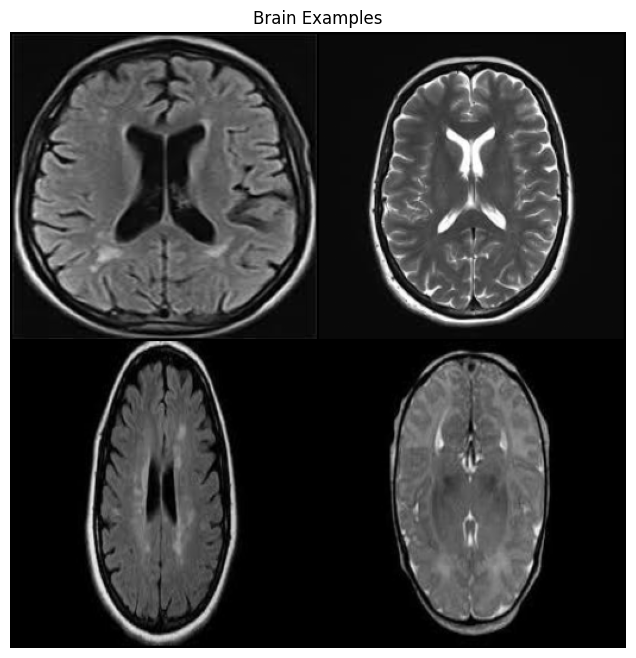

In [16]:
visualize_brain_examples(dataloader=brain_loader, num_examples=4, fig_size=(8,8))

In [17]:
model = VAE(**brain_configs, f_out = 'tanh')

In [29]:
optimizer = optim.Adam(model.parameters(), lr= 1e-3)

train(model,brain_loader,optimizer,device,epochs=25, f_out='tanh')

Epoch 1 -----> Loss: 4425.131105945521 | KL: 10406.220703125 | Reconstruction Error: 125679.921875
Epoch 2 -----> Loss: 1979.9227180460975 | KL: 11042.4765625 | Reconstruction Error: 87479.7421875
Epoch 3 -----> Loss: 1671.8373289353065 | KL: 9672.013671875 | Reconstruction Error: 87596.59375
Epoch 4 -----> Loss: 1603.1635263881612 | KL: 8366.6435546875 | Reconstruction Error: 80844.578125
Epoch 5 -----> Loss: 1536.3364531495547 | KL: 7661.017578125 | Reconstruction Error: 69084.9296875
Epoch 6 -----> Loss: 1517.3412208617076 | KL: 7166.50830078125 | Reconstruction Error: 75087.84375
Epoch 7 -----> Loss: 1486.6854210319539 | KL: 6956.32421875 | Reconstruction Error: 79061.8125
Epoch 8 -----> Loss: 1504.9490530055002 | KL: 6677.09375 | Reconstruction Error: 62968.62890625
Epoch 9 -----> Loss: 1511.2234522328445 | KL: 6597.748046875 | Reconstruction Error: 92457.2109375
Epoch 10 -----> Loss: 1531.726619794395 | KL: 6304.740234375 | Reconstruction Error: 68047.3515625
Epoch 11 -----> Loss

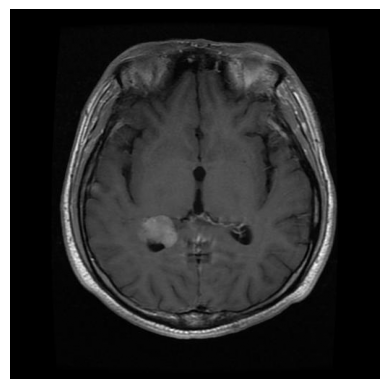

In [34]:
test_root = r"C:\Users\Ángel\Documents\GitHub\vae-project\notebooks\data\mri_brain_tumor\Testing\meningioma\Te-me_0297.jpg"
image = Image.open(test_root).convert('L')
plt.axis('off')
plt.imshow(image, cmap='gray')

In [20]:
model.eval()

VAE(
  (encoder): Encoder(
    (encoder): Sequential(
      (0): Linear(in_features=65536, out_features=1024, bias=True)
      (1): ReLU()
      (2): Linear(in_features=1024, out_features=512, bias=True)
      (3): ReLU()
      (4): Linear(in_features=512, out_features=256, bias=True)
      (5): ReLU()
    )
    (hidden2mu): Linear(in_features=256, out_features=64, bias=True)
    (hidden2logvar): Linear(in_features=256, out_features=64, bias=True)
  )
  (decoder): Decoder(
    (decoder): Sequential(
      (0): Linear(in_features=64, out_features=256, bias=True)
      (1): ReLU()
      (2): Linear(in_features=256, out_features=512, bias=True)
      (3): ReLU()
      (4): Linear(in_features=512, out_features=1024, bias=True)
      (5): ReLU()
    )
    (hidden2out): Linear(in_features=1024, out_features=65536, bias=True)
  )
)

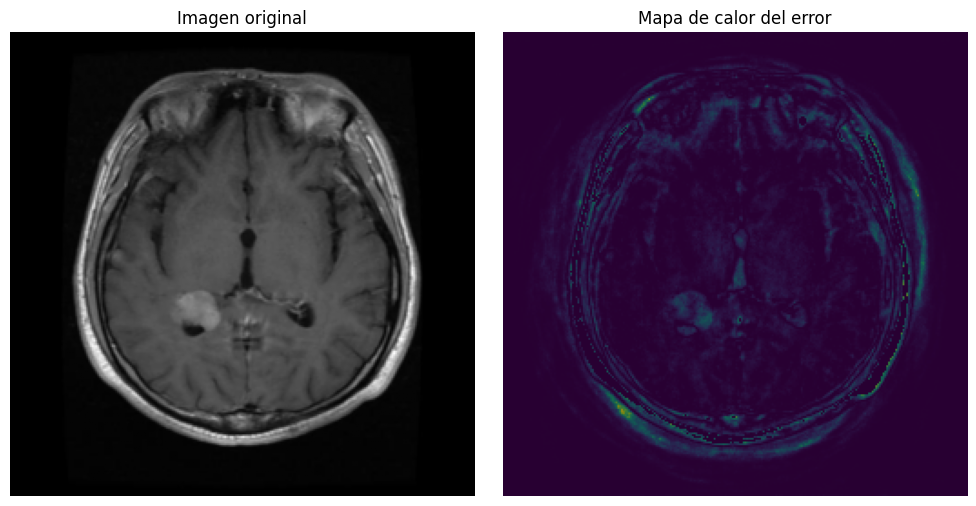

In [43]:
visualize_heatmap(image, model, device, threshold=0.05, cmap='viridis')

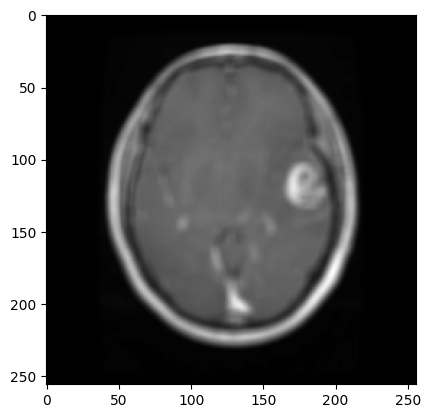

In [13]:
transform = transforms.Compose([
    transforms.Resize((256,256)),
    transforms.Grayscale(num_output_channels=1),
    transforms.GaussianBlur(kernel_size=7, sigma=9),
    transforms.ToTensor(),
])

x = transform(image).unsqueeze(0).squeeze().numpy()
plt.imshow(x, cmap='gray')

In [14]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(256, 256), dtype=float32)

In [15]:
import numpy as np 
np.min(x)

np.float32(0.0)